# Load Data

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home="./data")

In [2]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [3]:
import numpy as np

permutation = np.random.permutation(mnist.data.shape[0])

X = mnist.data[permutation]
y = mnist.target[permutation]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(X.shape[0], 10)):
    image = np.reshape(X[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
    array[int(i/5), i%5].set_title(y[index])
plt.show()

# Visualization Using PCA

In [5]:
from sklearn.decomposition import PCA

my_pca = PCA(n_components=2)
my_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
X_hat = my_pca.transform(X)
X_hat

array([[-894.02767547, -343.00973074],
       [ 692.42291636, -258.92045519],
       [-295.58413833, -527.54213141],
       ...,
       [-353.7549829 , -458.62026885],
       [ 492.6033587 , -920.28068621],
       [  53.38730544,  402.90259212]])

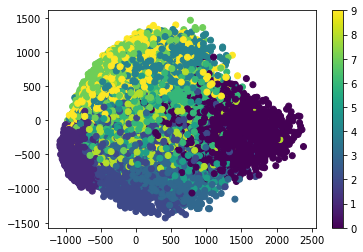

In [7]:
import matplotlib.pyplot as plt

sc = plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y)
plt.colorbar(sc)
plt.show()

### PCA for A Small Subset

In [8]:
from sklearn.decomposition import PCA

pca_for_0_1 = PCA(n_components=2)
pca_for_0_1.fit(X[y < 2])

X_hat = pca_for_0_1.transform(X[y < 2])

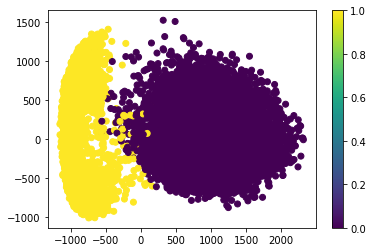

In [9]:
import matplotlib.pyplot as plt

sc = plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y[y < 2])
plt.colorbar(sc)
plt.show()

## Bonus: LDA (Extra Material)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)

/home/amir/.virtualenvs/MLW2/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

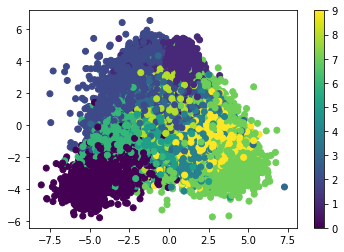

In [11]:
X_hat_lda = lda.transform(X)
X_hat_lda

sc = plt.scatter(X_hat_lda[:, 0], X_hat_lda[:, 1], c=y)
plt.colorbar(sc)
plt.show()

# Clustering

In [12]:
from sklearn.cluster import KMeans

my_kmeans = KMeans(n_clusters=10)
my_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
clusters = my_kmeans.predict(X)

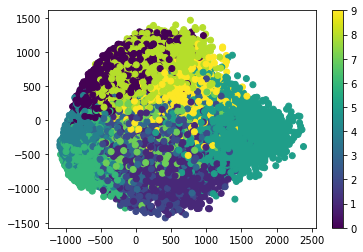

In [14]:
X_hat = my_pca.transform(X)

sc = plt.scatter(X_hat[:, 0], X_hat[:, 1], c=clusters)
plt.colorbar(sc)
plt.show()

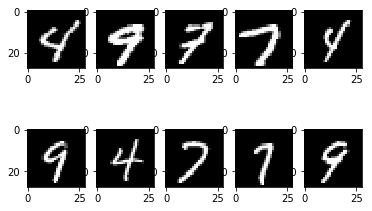

In [15]:
fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(
                            np.where(clusters == 0)[0], 10)):
    image = np.reshape(X[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
plt.show()

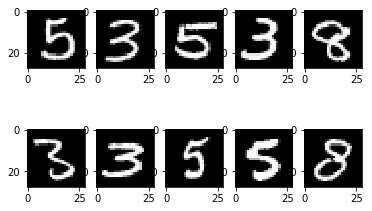

In [16]:
fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(
                            np.where(clusters == 1)[0], 10)):
    image = np.reshape(X[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
plt.show()

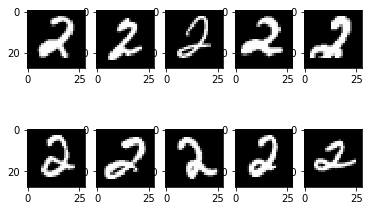

In [17]:
fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(
                            np.where(clusters == 2)[0], 10)):
    image = np.reshape(X[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
plt.show()

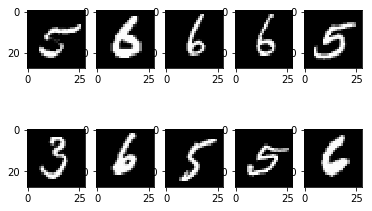

In [18]:
fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(
                            np.where(clusters == 3)[0], 10)):
    image = np.reshape(X[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
plt.show()

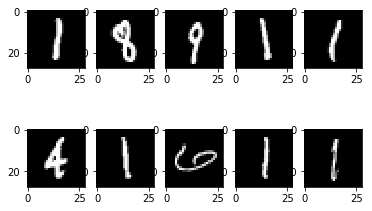

In [19]:
fig, array = plt.subplots(2, 5)
for i, index in enumerate(np.random.choice(
                            np.where(clusters == 4)[0], 10)):
    image = np.reshape(X[index], (28, 28))
    array[int(i/5), i%5].imshow(image, cmap='gray')
plt.show()

ValueError: c of shape (14780,) not acceptable as a color sequence for x with size 70000, y with size 70000

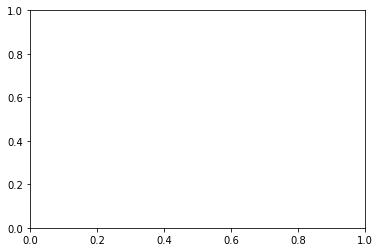

In [20]:
import matplotlib.pyplot as plt

sc = plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y[y < 2])
plt.colorbar(sc)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sc = plt.scatter(X_hat[:, 0], X_hat[:, 1], c=clusters[y < 2])
plt.colorbar(sc)
plt.show()

## Evaluation

In [ ]:
from sklearn import metrics

print("score: ", metrics.adjusted_rand_score(y, clusters))

## What If We Reduce Dimentions First?

In [ ]:
pca_50 = PCA(n_components=50)
pca_50.fit(X)

X_50 = pca_50.transform(X)

In [ ]:
my_kmeans = KMeans(n_clusters=10)
my_kmeans.fit(X_50)  # K-means would be faster

clusters_2 = my_kmeans.predict(X_50)

In [ ]:
X_hat = my_pca.transform(X)

sc = plt.scatter(X_hat[:, 0], X_hat[:, 1], c=clusters_2)
plt.colorbar(sc)
plt.show()

In [ ]:
from sklearn import metrics

print("score: ", metrics.adjusted_rand_score(y, clusters_2))